In [9]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

In [19]:
fig = plt.figure()
token = '262780d56c28122b55670b935f27b14208c2ec5aee540bd6851f449a161692783942974bde9b40c7f8f1d'
owner_id = 69511861
owner_unstripped = ':69511861,'
schetchik = 0
counter = 0

<Figure size 432x288 with 0 Axes>

In [11]:
def comments_words(whichpost):
    print(whichpost)
    req = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id={}&post_id={}&offset={}&v=5.92&access_token={}'.format(owner_id, whichpost, counter, token)) 
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')

    comments = []
    m = result.split('"')
    for x in range (len (m)):
        if m[x] == 'text':
            comments.append(m[x+2])

        if m[x] == 'response' and m[x+2] == "count" and m[x+3] == ':0,':
            print('no comments to post')
    wordsnum = 0
    numbers = []
    amounts = 0
    for comment in comments:
        wordsnum = len(comment.split())
        for x in range (1, len(comment)-1):
            if comment[x] == '\\' and comment[x+1] == 'n':
                wordsnum = wordsnum+1
        numbers.append(wordsnum)
    if len(numbers)!= 0:
        amounts = sum(numbers)/len(numbers)
        print(len(numbers))
    
    return (amounts)

In [12]:
def extra_infos():
    request = 'https://api.vk.com/method/users.get?user_ids={}&fields=sex,city,home_town,bdate&v=5.92&access_token={}'.format(owner_id, token)
    req = urllib.request.Request(request)
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    m = result.split('"')
    print(m)
    return m

In [17]:
def post_words():
    counter = 0
    req = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id={}&offset={}&count=5&v=5.92&access_token={}'.format(owner_id, schetchik, token)) 
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    m = result.split('"')
    postids = []
    for y in range (len(m)):
        if m[y] == 'id' and m[y+2] == 'from_id':
            whichpost = int(m[y+1].split(",")[0].split(":")[1])
            postids.append(whichpost)
    posts = []
    for x in range (len (m)):
        if m[x] == 'post' and m[x+2] == 'text' and m[x+4] != '' and m[x-7] == owner_unstripped:
             posts.append(m[x+4])
    wordsnum = 0
    whichpost = ""
    z = 0
    for post in posts:
        wordsnum = len(post.split())
        for x in range (1, len(post)-1):
            if post[x] == '\\' and post[x+1] == 'n':
                wordsnum = wordsnum+1
        amounts = comments_words(postids[z])
        z = z+1
        
        if amounts != 0:
            ratio = wordsnum/amounts
            print(wordsnum, 'words with average length of comments:', amounts, ', ratio:', ratio)

        else:
            ratio = None
            print(wordsnum, 'words with no comments', ', ratio:', ratio)
        scatter1 = plt.scatter(wordsnum, amounts)
    return ()

2678
5
14 words with average length of comments: 7.6 , ratio: 1.842105263157895
2676
no comments to post
195 words with no comments , ratio: None
2671
1
17 words with average length of comments: 19.0 , ratio: 0.8947368421052632
2670
no comments to post
6 words with no comments , ratio: None
2654
7
37 words with average length of comments: 6.0 , ratio: 6.166666666666667
2114
10
260 words with average length of comments: 11.6 , ratio: 22.413793103448278
2102
no comments to post
23 words with no comments , ratio: None
2100
2 words with no comments , ratio: None
2098
8 words with no comments , ratio: None
2092
21 words with no comments , ratio: None
['{', 'response', ':[{', 'id', ':69511861,', 'first_name', ':', 'Фаня', ',', 'last_name', ':', 'Даниэль', ',', 'is_closed', ':false,', 'can_access_closed', ':true,', 'sex', ':1,', 'bdate', ':', '29.1.1999', ',', 'city', ':{', 'id', ':1,', 'title', ':', 'Москва', '},', 'home_town', ':', 'москва', '}]}']


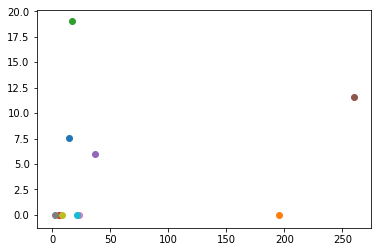

In [20]:
post_words()
schetchik=schetchik+100
ratio = post_words()
m = extra_infos()

plt.show()
